In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("data/weather_m4.csv")
df

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0,20.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0,33.0
8782,20161231,23,28,NaN,10246,98,6.0,9.0,1.0,1.0,0.0,0.0,0.0,34.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8784 non-null   int64  
 1   TIME             8784 non-null   int64  
 2   TEMP             8784 non-null   int64  
 3   MIN_TEMP_GROUND  1464 non-null   float64
 4   PRESSURE         8784 non-null   int64  
 5   HUMIDITY         8784 non-null   int64  
 6   VIEW_RANGE       8743 non-null   float64
 7   CLOUD            8743 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
 13  WEATHER_CODE     3862 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 960.9 KB


# Detecting and Inspecting Missing Values

In [4]:
df[["MIN_TEMP_GROUND", "VIEW_RANGE", "MIST", "WEATHER_CODE"]].head(15)

,MIN_TEMP_GROUND,VIEW_RANGE,MIST,WEATHER_CODE
0,NaN,56.0,0.0,10.0
1,NaN,57.0,0.0,10.0
2,NaN,56.0,0.0,23.0
3,NaN,57.0,0.0,51.0
4,NaN,56.0,0.0,22.0
5,3.0,9.0,1.0,34.0
6,NaN,5.0,1.0,34.0
7,NaN,1.0,1.0,34.0
8,NaN,2.0,1.0,32.0
9,NaN,5.0,1.0,32.0


In [5]:
df.isnull()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8780,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8781,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8782,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [7]:
df[df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,20161231,19,35,NaN,10271,98,7.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0,20.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0,33.0


In [8]:
# rows with all null values
df[df.isnull().all(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE


In [9]:
df.notnull().all()

YYYYMMDD            True
TIME                True
TEMP                True
MIN_TEMP_GROUND    False
PRESSURE            True
HUMIDITY            True
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [10]:
every_6th_row = pd.Series(range(5, len(df), 6))

In [11]:
every_6th_row

0          5
1         11
2         17
3         23
4         29
        ... 
1459    8759
1460    8765
1461    8771
1462    8777
1463    8783
Length: 1464, dtype: int64

In [12]:
# getting values from every 6th row
df["MIN_TEMP_GROUND"][every_6th_row]

5        3.0
11     -17.0
17      47.0
23      47.0
29      48.0
        ... 
8759    32.0
8765    29.0
8771    29.0
8777    37.0
8783    26.0
Name: MIN_TEMP_GROUND, Length: 1464, dtype: float64

In [13]:
# double check whether every 6th row has data by ensuring not null
# 1)
df["MIN_TEMP_GROUND"][every_6th_row].notnull().all()

True

In [14]:
# double check other remaining rows (excpet for every 6th row)
# 2)
df["MIN_TEMP_GROUND"].drop(every_6th_row).isnull().all()

True

In [15]:
# Rewriting the same logic as above two lines using loc
# 1) 
df.loc[every_6th_row, "MIN_TEMP_GROUND"].notnull().all()

True

In [16]:
# 2)
df.drop(df.index[every_6th_row]).index

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,
            ...
            8772, 8773, 8774, 8775, 8776, 8778, 8779, 8780, 8781, 8782],
           dtype='int64', length=7320)

In [17]:
df.loc[df.drop(df.index[every_6th_row]).index, "MIN_TEMP_GROUND"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8778   NaN
8779   NaN
8780   NaN
8781   NaN
8782   NaN
Name: MIN_TEMP_GROUND, Length: 7320, dtype: float64

# Handling missing data

In [18]:
df.drop(columns="WEATHER_CODE")

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20161231,20,35,NaN,10265,98,11.0,8.0,1.0,0.0,0.0,0.0,0.0
8780,20161231,21,34,NaN,10258,98,9.0,9.0,1.0,0.0,0.0,0.0,0.0
8781,20161231,22,30,NaN,10253,98,9.0,9.0,1.0,1.0,0.0,0.0,0.0
8782,20161231,23,28,NaN,10246,98,6.0,9.0,1.0,1.0,0.0,0.0,0.0


In [19]:
# remove unecessary columns
df.drop(columns="WEATHER_CODE", inplace=True)

In [20]:
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0


In [21]:
df["MIN_TEMP_GROUND"].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
8779     0.0
8780     0.0
8781     0.0
8782     0.0
8783    26.0
Name: MIN_TEMP_GROUND, Length: 8784, dtype: float64

In [22]:
# if we want to fill empty values with forward values or backward values
# forwards method will fill based on the previous values
df['MIN_TEMP_GROUND'].fillna(method='ffill', inplace=True)

In [23]:
df.head(15)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0
6,20160101,7,11,3.0,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0
7,20160101,8,7,3.0,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,20160101,9,2,3.0,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0
9,20160101,10,20,3.0,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# backward methods use values from backwards so it won't leave first 5 rows with NaN
df['MIN_TEMP_GROUND'].fillna(method='bfill', inplace=True)

In [25]:
df.head(15)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,3.0,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,3.0,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,3.0,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,3.0,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,3.0,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0
6,20160101,7,11,3.0,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0
7,20160101,8,7,3.0,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,20160101,9,2,3.0,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0
9,20160101,10,20,3.0,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
# if we check again , MIN_TEMP_GROUND will have no Null Values anymore
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND    False
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
dtype: bool

In [28]:
# if we want to see null values rows
df[df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,124.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,124.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,124.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,95.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,95.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,95.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,95.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,95.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# if we want to see misisng by which months and year
df.loc[df.isnull().any(axis=1), "YYYYMMDD"].value_counts()

20160821    20
20160809    12
20160822    11
Name: YYYYMMDD, dtype: int64

In [33]:
# collecting all null values into seperate df
nulls_dropped = df.dropna()

In [34]:
nulls_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         8741 non-null   int64  
 1   TIME             8741 non-null   int64  
 2   TEMP             8741 non-null   int64  
 3   MIN_TEMP_GROUND  8741 non-null   float64
 4   PRESSURE         8741 non-null   int64  
 5   HUMIDITY         8741 non-null   int64  
 6   VIEW_RANGE       8741 non-null   float64
 7   CLOUD            8741 non-null   float64
 8   MIST             8741 non-null   float64
 9   RAIN             8741 non-null   float64
 10  SNOW             8741 non-null   float64
 11  THUNDER          8741 non-null   float64
 12  ICE              8741 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 956.0 KB


In [36]:
# if we look at the data, we can see indexes are out of align
nulls_dropped[5300:5310]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5300,20160808,21,131,169.0,10211,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5301,20160808,22,133,169.0,10209,97,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5302,20160808,23,135,169.0,10209,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5303,20160808,24,136,124.0,10208,94,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5304,20160809,1,141,124.0,10205,89,70.0,8.0,0.0,0.0,0.0,0.0,0.0
5305,20160809,2,123,124.0,10199,92,65.0,1.0,0.0,0.0,0.0,1.0,0.0
5318,20160809,15,143,110.0,10234,85,59.0,8.0,0.0,1.0,0.0,0.0,0.0
5319,20160809,16,160,110.0,10231,65,80.0,2.0,0.0,1.0,0.0,0.0,0.0
5320,20160809,17,156,110.0,10231,62,80.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,20160809,18,140,135.0,10227,72,75.0,1.0,0.0,0.0,0.0,0.0,0.0


## using thresh 
- thresh allow to set what is the minium thresh level 

In [39]:
# here we set thresh level of 7, keeping rows with at least 7 non NA values
# however we see only 5 non NA values are thre
drop_thresh = df.dropna(thresh=7)
drop_thresh[drop_thresh.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5317,20160809,14,167,110.0,10233,65,80.0,2.0,NaN,NaN,NaN,NaN,NaN
5626,20160822,11,193,160.0,10233,88,65.0,8.0,NaN,NaN,NaN,NaN,NaN


# replacing with values

In [40]:
rows_to_fill = df.isnull().any(axis=1)
rows_to_fill

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [41]:
df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,124.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,124.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,124.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,95.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,95.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,95.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,95.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,95.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# we want to fill mean values of data set to those rows with null values
# first, fill the null values with mean
# second, get the values of the previously NA rows 
nulls_filled = df.fillna(df.mean())
nulls_filled[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,124.0,10207,90,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5307,20160809,4,107,124.0,10206,93,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5308,20160809,5,104,124.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5309,20160809,6,115,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5310,20160809,7,125,95.0,10211,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5311,20160809,8,144,95.0,10217,75,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5312,20160809,9,148,95.0,10222,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5313,20160809,10,156,95.0,10228,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5314,20160809,11,153,95.0,10230,65,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5315,20160809,12,161,110.0,10231,60,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016


In [44]:
# fill null values with Mode
df.fillna(df.mode().iloc[0], inplace=True)

In [46]:
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
0,20160101,1,68,3.0,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0
1,20160101,2,58,3.0,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20160101,3,57,3.0,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0
3,20160101,4,60,3.0,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0
4,20160101,5,45,3.0,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0


# Removing Outliers

In [48]:
athletes = pd.read_csv("data/athletes.csv")
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11543 non-null  int64  
 1   nationality  11543 non-null  object 
 2   sex          11543 non-null  object 
 3   height       11213 non-null  float64
 4   weight       10884 non-null  float64
 5   sport        11543 non-null  object 
 6   gold         11543 non-null  object 
 7   silver       11543 non-null  object 
 8   bronze       11543 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 811.7+ KB


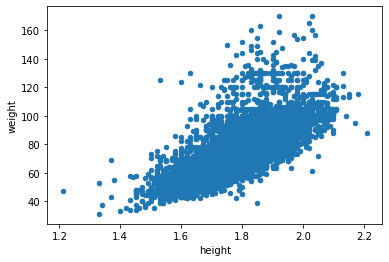

In [50]:
%matplotlib inline
athletes.plot.scatter(x="height", y="weight");

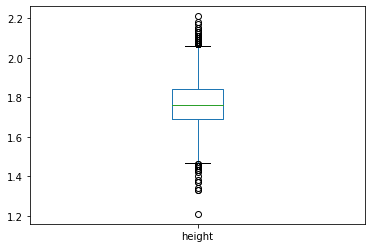

In [52]:
heights = athletes["height"]
heights.plot.box();

In [67]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr

In [68]:
heights.between(pmin, pmax)

0        True
1        True
2        True
3        True
4        True
         ... 
11538    True
11539    True
11540    True
11541    True
11542    True
Name: height, Length: 11543, dtype: bool

In [69]:
nwh = heights[heights.between(pmin, pmax)]

In [70]:
nwh.head()

0    1.72
1    1.68
2    1.98
3    1.83
4    1.81
Name: height, dtype: float64

In [71]:
#new variable without outliners
new_heights = heights.where(heights.between(pmin, pmax))

In [72]:
# for comparions
compare = pd.DataFrame({"before": heights, "after": new_heights})

In [73]:
compare.describe()

,before,after
count,11213.000000,11121.000000
mean,1.766294,1.765098
std,0.112702,0.108867
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


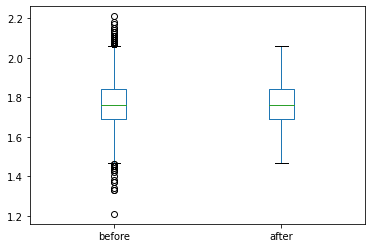

In [75]:
compare.plot.box();

In [76]:
# changes to original heights 
heights.where(heights.between(pmin, pmax), inplace=True)

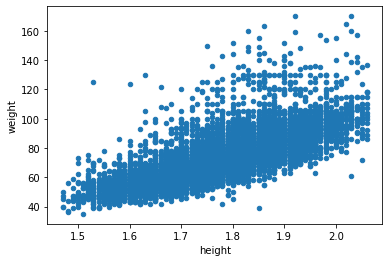

In [79]:
athletes.plot.scatter(x="height", y="weight")

# Removing Duplicates

In [80]:
athletes.duplicated().any()

True

In [82]:
athletes[athletes.duplicated()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze
3224,277821751,RUS,female,1.76,67.0,aquatics,0,0,1
3813,96493170,GER,male,1.82,78.0,football,0,1,0
5676,891867859,USA,male,1.88,86.0,athletics,1,0,0
9695,848761398,COL,male,1.70,61.0,cycling,0,0,0
10774,1152723,GRE,female,1.81,70.0,fencing,0,0,0


In [83]:
athletes.drop_duplicates(inplace=True)

In [85]:
athletes.duplicated().any()

False

In [88]:
# checking how many unique nationality are there
athletes["nationality"].drop_duplicates()

0        ESP
1        KOR
2        CAN
3        MDA
4        NZL
        ... 
7099     SOM
7251     PNG
7699     YEM
8678     SWZ
10400    DMA
Name: nationality, Length: 207, dtype: object

In [89]:
athletes["nationality"].drop_duplicates().sort_values()

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
       ... 
4198    VIE
1589    VIN
7699    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [91]:
# there is bultin function for this 
athletes["nationality"].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
SOM      2
LBR      2
SWZ      2
MTN      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [92]:
# ratio of men vs women
athletes["sex"].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

# Conversion Types

In [93]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  object 
 7   silver       11538 non-null  object 
 8   bronze       11538 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 901.4+ KB


In [95]:
athletes[["gold", 'silver', 'bronze']].head()

,gold,silver,bronze
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [96]:
athletes["bronze"].sum()

'001000100000000000000000000000000000000000000000000000010100000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000100000000001001000000000000000000000000000010000000000000000000000000000000100000000000000010000000000000000000000000010000000000000000000000000011000000010000000000000000000000100000000000000000010010000000000100000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000000000000000000000010000100000000000101100010001000000100000000000000000000000000000000010000000000000000000000000000001000000000010000000000000010000001000000000000000000000000000110000000000000101000000000000000000000000000000000000000100000000002000000000100000000000000000000000000000000100100001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000100000000000000000000001000011000010000000001000000010100010000010000010001000000000

In [97]:
# above result is not what we want, we want medals columns as integer not as string
athletes['bronze'].astype(int)

ValueError: invalid literal for int() with base 10: 'O'

In [99]:
# we can see that someone type letter O instead of zero 0 in one of the values
# so we need to fix it first.
athletes[athletes["bronze"] == 'O']

,id,nationality,sex,height,weight,sport,gold,silver,bronze
7521,666617738,RUS,male,1.71,72.0,canoe,O,O,O


In [100]:
athletes.loc[7521, ['gold', 'silver', 'bronze']] = 0

In [102]:
# after fixing, converting to int
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int)

In [104]:
# now getting sum of medals
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

In [105]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   height       11116 non-null  float64
 4   weight       10879 non-null  float64
 5   sport        11538 non-null  object 
 6   gold         11538 non-null  int32  
 7   silver       11538 non-null  int32  
 8   bronze       11538 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 1.1+ MB



# Fixing Indexes

In [106]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [107]:
# as original data have id columns, we can use it as index
athletes.set_index("id", drop=True, inplace=True)
athletes.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [108]:

# changing column name
athletes.rename(
    columns={"nationality": "country", "sport": "discipline"},
    inplace=True
)

athletes.head()

,country,sex,height,weight,discipline,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


----------

In [109]:
df = pd.read_csv("data/weather_m4.csv")

In [110]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 5 to 8783
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YYYYMMDD         831 non-null    int64  
 1   TIME             831 non-null    int64  
 2   TEMP             831 non-null    int64  
 3   MIN_TEMP_GROUND  831 non-null    float64
 4   PRESSURE         831 non-null    int64  
 5   HUMIDITY         831 non-null    int64  
 6   VIEW_RANGE       831 non-null    float64
 7   CLOUD            831 non-null    float64
 8   MIST             831 non-null    float64
 9   RAIN             831 non-null    float64
 10  SNOW             831 non-null    float64
 11  THUNDER          831 non-null    float64
 12  ICE              831 non-null    float64
 13  WEATHER_CODE     831 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 97.4 KB


In [111]:
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0


In [113]:
# reset index
df.reset_index(drop=True)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20161230,24,40,32.0,10340,93,37.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
827,20161231,6,29,29.0,10326,99,3.0,9.0,1.0,0.0,0.0,0.0,0.0,33.0
828,20161231,12,45,29.0,10307,98,21.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
829,20161231,18,37,37.0,10277,98,8.0,9.0,1.0,0.0,0.0,0.0,0.0,34.0
